In this file, we will extract variables of interests and control variables that will be use for building the risk table of cognitive decline in different occupation subgroups.

In [1]:
## Scientific Computing with Python
import pyreadstat as pr
import pandas as pd
import numpy as np

## Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer

## File dirtectory
import os
import gc

# 1. Read the Data and Extract Columns of Interests

In [2]:
## Import Variables of Interest Saved in Pipleine/varList.py
import Pipeline.varList
varComplete = Pipeline.varList.varComplete
varInterest = Pipeline.varList.interestVars

In [4]:
## Import Variales of Interest in every row
from Pipeline.unPivot import *

hrsFull = pr.pyreadstat.read_sas7bdat(
    filename_path = "../../Data/randhrs1992_2022v1.sas7bdat",
    usecols = varComplete,
    metadataonly = False
)[0]

In [5]:
## Convert to Wide Format
import Pipeline.unPivot as up

# Convert to long Format
fileNameAll = "../Data/joinedHRSALL.csv"
fileNameWave = "../Data/joinedHRSWAVE.csv"
up.unPivotSelectedVars(hrsFull, varInterest, fileNameAll, fileNameWave, idCol="HHIDPN")

c:\Users\86139\Desktop\PARA Note System\Projects\Inter-University Health Data\2025-Inter-Univer-Health-Data\Code\Pipeline\unPivot.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targetDf.dropna(axis = 0, how = "all", inplace = True)


In [6]:
del hrsFull
gc.collect()

20

# 2. Data Cleaning

In [7]:
from Pipeline.cleanVarGroups import hrsSet
from Pipeline.varList import *

fileNameAll = "../Data/joinedHRSALL.csv"
fileNameWave = "../Data/joinedHRSWAVE.csv"
## Import long format data
hrsAll = pd.read_csv(fileNameAll, low_memory=False)
hrsWave = pd.read_csv(fileNameWave, low_memory=False)
hrsCombo = hrsSet(hrsAll, hrsWave) ## Creat the hrsCombo class

## 2.1 Subset Rows with non-null important columns

In [8]:
## Extract rows with non-null repesonse
hrsCombo = hrsSet(hrsAll, hrsWave)
hrsCombo.extractNonNull("all")
print(hrsCombo.Wave.shape)

gc.collect()

(145625, 54)


31

## 2.2 Combining Cluttered Columns

In [15]:
len(hrsCombo.Wave.columns)

44

In [ ]:
## Combining functional limitation variables
physicalLimitVars = [
    "RwWALKR", # Diff-Walk across room. p878,905 [catgeorical variable]
    "RwDRESS", # Diff-Dressing. p883 [catgeorical variable]
    "RwBATH", # Diff-Bathing or showering. p887 [catgeorical variable]
    "RwEAT", # Diff-Eating. p891 [catgeorical variable]
    "RwBED", # Diff-Get in/out of bed. p895 [catgeorical variable]
    "RwTOILT", #Diff-Using the toilet. p900 [catgeorical variable]
    "RwMEALS"]

cognLimitVars = ["RwMAP", # Diff-Use a map. p950 [catgeorical variable]
    "RwPHONE", # Diff-Use telephone(no data for wave 1 but good for wave 2 to 16) p954 [catgeorical variable]
    "RwMONEY", # Diff-Managing money(no data for wave 1 but good for wave 2 to 16) p958 [catgeorical variable]
    "RwMEDS", # Diff-Take medications(no data for wave 1 but good for wave 2 to 16) p961 [catgeorical variable]
    "RwSHOP"]

hrsCombo.combineColumns("RwPhyLim", physicalLimitVars, method = "any")
hrsCombo.combineColumns("RwCogLim", cognLimitVars, method = "any")
hrsCombo.Wave.drop(physicalLimitVars + cognLimitVars, inplace=True)

c:\Users\86139\Desktop\PARA Note System\Projects\Inter-University Health Data\2025-Inter-Univer-Health-Data\Code\Pipeline\cleanVarGroups.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.Wave[newColName] = self.Wave[colList].any(axis=1)
c:\Users\86139\Desktop\PARA Note System\Projects\Inter-University Health Data\2025-Inter-Univer-Health-Data\Code\Pipeline\cleanVarGroups.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.Wave.drop(columns = colList, inplace = True)
c:\Users\86139\Desktop\PARA Note System\Projects\Inter-University Health Data\2025

KeyError: "['RwWALKR', 'RwDRESS', 'RwBATH', 'RwEAT', 'RwBED', 'RwTOILT', 'RwMEALS', 'RwMAP', 'RwPHONE', 'RwMONEY', 'RwMEDS', 'RwSHOP'] not found in axis"

In [16]:
hrsCombo.Wave[["RwPhyLim", "RwCogLim"]].head(20)

,RwPhyLim,RwCogLim
18,False,True
20,False,True
34,False,False
37,False,False
38,False,False
39,False,False
40,False,False
41,False,False
42,True,False
50,False,False


## 2.2 Basic Preprocessing-----Scaling, Astype, Mapping

In [ ]:
# Log transform finance variables
financeVars = financials
hrsCombo.logFinance(financeVars)

## Standardize years of age in 
ageVars = ["RwAGEM_B"]
hrsCombo.standardizeAge(ageVars)

# ## Recode sibling and children every born
sibChildMapper = lambda x: 0 if x <= 3 else 1 if x <= 8 else 2 if x <= 13 else x
hrsCombo.discretize(sibChildMapper, ["RwLIVBRO", "RAEVBRN"])

# Recode work requirement variables
workReqMapper = lambda x: 1 if x <= 2 else 0 if x <= 5 else x
workReqList = ["RwJPHYS", "RwJLIFT",  "RwJSTRES", "RwJSTOOP", "RwJSIGHT"]
hrsCombo.discretize(workReqMapper, workReqList)

# Recode medical conditions
medCondMapper = lambda x: 1 if x in [1, 3, 5] else  0 if x in [2,4,6] else x
hrsCombo.discretize(medCondMapper, medicalConds)


## Cast integer-valued variables to int
intVars = ["RwLIVBRO", "RAEVBRN", "RwAGE_B", "RwAGE_B2", "RwAGE_B3"]
hrsCombo.castType(intVars, "category")

c:\Users\86139\Desktop\PARA Note System\Projects\Inter-University Health Data\2025-Inter-Univer-Health-Data\Code\Pipeline\cleanVarGroups.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.Wave[var] = self.Wave[var].astype(dtype)


<Axes: >

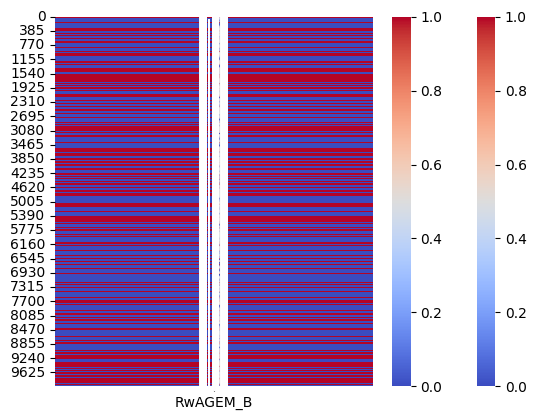

In [ ]:
# hrsWave.describe()
## Double check if financial variables are acquired and transformed corretly
 

# hrsCombo.Wave[["HHIDPN", "Wave"] + financeVars].head(20)
# hrsWave[["HHIDPN", "Wave"] + financeVars].head(20)

# sns.histplot(hrsWave[financeVars[0]], kde=True, bins=50)

# sns.heatmap(hrsWave[ageVars][0:10000].isnull(), annot=True, cmap='coolwarm', fmt='.2f')
# sns.heatmap(hrsCombo.Wave[ageVars][0:10000].isnull(), annot=True, cmap='coolwarm', fmt='.2f')



In [19]:
# (hrsWave["RwAGEM_B"][0:100] - 65)/12 == hrsCombo.Wave["RwAGEM_B"][0:100]
# hrsWave[medicalConds[3]][0:100]
hrsCombo.Wave["RwVIGACT"][0:100]

18     0.0
20     0.0
34     1.0
37     1.0
38     NaN
      ... 
279    NaN
280    NaN
281    NaN
282    NaN
283    NaN
Name: RwVIGACT, Length: 100, dtype: float64

## 2.2 Cluster job occupation codes between different census

In [20]:
class hrsSet:
    def __init__(self, hrsAll, hrsWave):
        '''
        hrsAll is a DataFrame containing all variables that are not specific to any single wave.
        hrsWave is a DataFrame containing variables that are specific to every wave.
        '''
        self.All = hrsAll
        self.Wave = hrsWave

    def logFinance(self, financeVars):
        """
        Transform financial variables to log scale.
        """    
        for var in financeVars:
            if var in self.Wave.columns:
                self.Wave[var] = self.Wave[var].apply(lambda x: 
                                                      np.log1p(np.add(x, 1)) 
                                                      if pd.notnull(x) else x)        
        return None


    def standardizeAge(self, ageVars):
        """
        Standardize age variables.
        """
        for var in ageVars:
            if var in self.Wave.columns:
                self.Wave[var] = (self.Wave[var] - 65) / 12   
        return None
    
    def discretize(self, mapper, varList):
        '''
        Discretize continuous or discrete variables of many values into a simpler value structure.

        Parameters:
        mapper (dict): A lambda function that maps the original values to new values.
        varList (list): A list of variable names to be discretized.
        '''
        for var in varList:
            if var in self.Wave.columns:
                self.Wave[var] = self.Wave[var].map(mapper)
                self.Wave[var] = self.Wave[var].astype('category')


    def castType(self, varList, dtype):
        """
        Cast the type of variables in varList to the specified dtype.
        
        Parameters:
        varList (list): A list of variable names to be casted.
        dtype: The target data type to cast the variables to.
        """
        for var in varList:
            if var in self.Wave.columns:
                self.Wave[var] = self.Wave[var].astype(dtype)
        
        return None
    
    def groupOccupations(self):
        """
        Creates the new column in self.Wave called "RwJOCCSD", with all occupations 
        Drop the old occupation column list "RwOCC" if it exists.
        Relabel occupation variables based on a mapping dictionary.
        
        Parameters:
        occupationMap (dict): A dictionary mapping old occupation codes to new labels.
        """
        ## Map numbers to occupation names in different census years
        self.Wave["RwJCOCC"] = self.Wave["RwJCOCC"].map(occLookUp.occupation_1980)
        self.Wave["RwJCOCCA"] = self.Wave["RwJCOCCA"].map(occLookUp.occupation_ahead)
        self.Wave["RwJCOCCB"] = self.Wave["RwJCOCCB"].map(occLookUp.occupation_2000)
        self.Wave["RwJCOCCC"] = self.Wave["RwJCOCCC"].map(occLookUp.occupation_2010)
        
        ## Map occupation codes to standardized groups
        allOccs = ["RwJCOCC", "RwJCOCCA", "RwJCOCCB", "RwJCOCCC"]
        self.Wave[allOccs] = self.Wave[allOccs].apply(
            lambda x: x.map(occLookUp.codeToGroup),
            axis=0
        )
        print("Occupation codes across waves are:")
        print(self.Wave[allOccs].head(10))

        ## Take the most common occupation grouping across all waves as the final occupation
        self.Wave["RwJOCCSD"] = self.Wave[allOccs].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan, 
                                                         axis=1) 
        # print(self.Wave["RwJOCCSD"].head(10))      
        # # ## Drop the old occupation columns if they exist
        self.Wave.drop(columns=allOccs, inplace=True)
                
        return None

    def combineColumns(self, newColName, colList, method = "all", combFunc = None):
        """
        Combine multiple columns into a single column by taking OR or AND operation.
        
        Parameters:
        newColName (str): The name of the new column to be created.
        colList (list): A list of column names to be combined.
        """
        if (method not in ["all", "any"]) and (combFunc is None):
            raise ValueError("Method is not 'all' or 'any', or combFunc is None.")
        elif method == "all":
            self.Wave[newColName] = self.Wave[colList].all(axis=1)
        elif method == "any":
            self.Wave[newColName] = self.Wave[colList].any(axis=1)
        else:
            self.Wave[newColName] = self.Wave[colList].apply(combFunc, axis = 0)
        
        self.Wave.drop(columns = colList, inplace = True)
        return None
    
    def extractNonNull(self, how):
        """
        Extract individuals with non-null cognition variables, RwTR20 and ReMSTOT, or non-null cognitive impairement
        For individyuals with part of their cognitive status null,  
        It imputes missing values with forward fill and back fill
        
        Returns: none
        Mutate: self.Wave
        """
        non_null_response = (
            self.Wave[['RwTR20', 'RwMSTOT']].notnull().all(axis=1) |
            self.Wave[["RwLOST", "RwWANDER", "RwALONE", "RwHALUC"]].notnull().all(axis=1)
        )
        self.Wave = self.Wave[non_null_response]
        

    def dealNAs(self, varList, fillValue=0):
        """
        Deal with missing values in the specified variables.
        
        Parameters:
        varList (list): A list of variable names to handle missing values for.
        fillValue: The value to fill in for missing values. Default is 0.
        """
        self.Wave.fillna(method='ffill', axis = 0, inplace = True)
        self.Wave.fillna(method='bfill', axis = 0, inplace = True)
        
        return None
    

In [ ]:
# from Pipeline.cleanVarGroups import hrsSet
# from Pipeline.varList import *

# ## File directory
# fileNameAll = "../Data/joinedHRSALL.csv"
# fileNameWave = "../Data/joinedHRSWAVE.csv"
# ## Import long format data
# hrsAll = pd.read_csv(fileNameAll, low_memory=False)
# hrsWave = pd.read_csv(fileNameWave, low_memory=False)

In [114]:
hrsCombo = hrsSet(hrsAll, hrsWave)
# hrsCombo.groupOccupations()
# hrsCombo.Wave["RwJOCCSD"].describe()

In [ ]:
# hrsCombo.Wave["RwJCOCCSD"] = hrsCombo.Wave[["RwJCOCC", "RwJCOCCA", "RwJCOCCB", "RwJCOCCC"]].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan, 
#                                                          axis=1) 
# hrsCombo.Wave["RwJCOCCSD"].describe()
hrsCombo.groupOccupations()

c:\Users\86139\Desktop\PARA Note System\Projects\Inter-University Health Data\2025-Inter-Univer-Health-Data\Code\Pipeline\cleanVarGroups.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.Wave["RwJCOCC"] = self.Wave["RwJCOCC"].map(occLookUp.occupation_1980)
c:\Users\86139\Desktop\PARA Note System\Projects\Inter-University Health Data\2025-Inter-Univer-Health-Data\Code\Pipeline\cleanVarGroups.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.Wave["RwJCOCCA"] = self.Wave["RwJCOCCA"].map(occLook

Occupation codes across waves are:
                             RwJCOCC RwJCOCCA RwJCOCCB RwJCOCCC
18                               NaN      NaN      NaN      NaN
20                               NaN      NaN      NaN      NaN
34  Skilled Trades/Production/Manual      NaN      NaN      NaN
37  Skilled Trades/Production/Manual      NaN      NaN      NaN
38  Skilled Trades/Production/Manual      NaN      NaN      NaN
39                               NaN      NaN      NaN      NaN
40                               NaN      NaN      NaN      NaN
41                               NaN      NaN      NaN      NaN
42                               NaN      NaN      NaN      NaN
50                             Sales      NaN      NaN      NaN


In [15]:
print(hrsCombo.Wave.describe())
print(hrsCombo.All.describe())

             HHIDPN           Wave         RwTR20        RwMSTOT  \
count  7.237440e+05  723744.000000  198678.000000  131586.000000   
mean   3.062324e+08       8.500000       9.792821      12.509089   
std    2.523906e+08       4.609775       3.612157       2.576556   
min    1.010000e+03       1.000000       0.000000       0.000000   
25%    7.720404e+07       4.750000       7.000000      11.000000   
50%    2.060855e+08       8.500000      10.000000      13.000000   
75%    5.307750e+08      12.250000      12.000000      15.000000   
max    9.597380e+08      16.000000      20.000000      15.000000   

             RwLOST      RwWANDER       RwALONE       RwHALUC         RwWORK  \
count  14400.000000  14537.000000  14585.000000  14332.000000  295259.000000   
mean       0.256875      0.071542      0.771478      0.189366       0.391971   
std        0.436925      0.257736      0.419895      0.391813       0.488191   
min        0.000000      0.000000      0.000000      0.000000      

## 2.4 Combine Clutter explanatory columns

In [ ]:
# ## Convert to boolean and fill out NAs
# # hrsCombo.Wave[["RwLOST", "RwWANDER", "RwHALUC"]] = hrsCombo.Wave[["RwLOST", "RwWANDER", "RwHALUC"]].fillna(0).astype(bool)
# # hrsCombo.Wave["RwALONE"] = hrsCombo.Wave["RwALONE"].fillna(1).astype(bool)

# # create a new column for cognitive impairment
# anyCogImp = lambda x: 1 if x[0,1,3].any() or ~x[2] else 0
# # hrsCombo.combineColumns("RwCogImp", ["RwLOST", "RwWANDER", "RwHALUC", "RwALONE"], method = None, combFunc = anyCogImp)
# # hrsCombo.Wave["RwCogImp"].sum()
# hrsCombo.Wave.loc[0:2001, ["RwLOST", "RwWANDER", "RwHALUC", "RwALONE"]].apply(anyCogImp, axis = 0)
# # neg_rw_alone = ~hrsCombo.Wave["RwALONE"].astype(bool)
# # neg_rw_alone

# # hrsCombo.Wave["RwALONE"].unique()

KeyError: 'key of type tuple not found and not a MultiIndex'

## 2.5 Impute Missing Values

In [ ]:
# ## If the "RwWORK" is 0 (retired), then the "RwJHRS" is 0 (hours worked per week)
# hrsCombo.Wave["RwJHOURS"] = hrsCombo.Wave.apply(
#     lambda x: 0 if x["RwWORK"] == 0 else x["RwJHOURS"], axis=1
# )

# ## If the "RwWORK" is 0 (retired), then the "RwJCOCCSD" is Retired
# hrsCombo.Wave["RwJCOCCSD"] = hrsCombo.Wave.apply(
#     lambda x: "Retired" if x["RwWORK"] == 0 else x
#     , axis=1)

# ## Forward and back fill the missing values in the Wave DataFrame
hrsCombo.Wave.loc[0:1001, ["HHIDPN", "Wave", "RwJCOCC"]].fillna(method='ffill', axis = 0).fillna(method='bfill', axis = 0)

C:\Users\86139\AppData\Local\Temp\ipykernel_2712\954647766.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hrsCombo.Wave.loc[0:1001, ["HHIDPN", "Wave", "RwJCOCC"]].fillna(method='ffill', axis = 0).fillna(method='bfill', axis = 0).describe()#.reset_index(drop=True)


,HHIDPN,Wave,RwJCOCC
count,2.810000e+02,281.000000,281.000000
mean,9.597750e+06,8.306050,5.836299
std,2.365463e+06,3.350735,4.471525
min,2.010000e+03,3.000000,1.000000
25%,1.005902e+07,6.000000,2.000000
50%,1.010903e+07,9.000000,4.000000
75%,1.028102e+07,11.000000,8.000000
max,1.040401e+07,16.000000,15.000000


In [60]:
# cluster the occpations using KMeans
from sklearn.cluster import KMeans
from sklearn import metrics
from collections import defaultdict

kList = list(range(2,20))
scoreDf = pd.DataFrame(index=kList, columns=["Silhouette Coefficient",
                                                "Calinski-Harabasz Index",
                                                "Davies-Bouldin Index"])

for cand_k in kList:
    kmeans = KMeans(
        n_clusters=cand_k,
        max_iter=100,
        n_init=5,
    )
    kmeans.fit_transform(occVecDf)

    # Evaluation
    scores = defaultdict(list)
    scores["Silhouette Coefficient"].append(
        metrics.silhouette_score(occVecDf, kmeans.labels_, sample_size=2000)
    )
    scores["Calinski-Harabasz Index"].append(
        metrics.calinski_harabasz_score(occVecDf.toarray(), kmeans.labels_)
    )
    scores["Davies-Bouldin Index"].append(
        metrics.davies_bouldin_score(occVecDf.toarray(), kmeans.labels_)
    )
    scoreDf.loc[cand_k] = scores

print(scoreDf)
    

# kmeans = KMeans(
#         n_clusters=5,
#         max_iter=100,
#         n_init=5,
#     )
# kmeans.fit_transform(occVecDf)

# pd.DataFrame([kmeans.labels_, occupation_all_val], 
#             columns=["Cluster", "Occupation"]).sort_values(by="Cluster")



    Silhouette Coefficient Calinski-Harabasz Index  Davies-Bouldin Index
2   [0.022745607152715275]    [3.0370981156364616]    [3.54104696236505]
3    [0.03081662867670651]    [2.8252564274865346]  [3.2106343265678206]
4   [0.039682833980139894]    [2.6847786911762226]   [3.045267651545708]
5    [0.04801988293266492]      [2.62724817938636]    [2.60882403703404]
6   [0.058627779431467665]     [2.428234952378288]   [2.536915238121277]
7    [0.10452222479501164]    [2.5224072959403774]   [2.231701271979948]
8    [0.10272051718348224]     [2.353836328012539]   [2.392626274870912]
9    [0.12001456075116833]       [2.5157764578416]  [2.1709494616166753]
10   [0.11120262936618508]     [2.398690131400177]   [2.277385619560347]
11    [0.1437198597172155]     [2.360925985192082]  [2.1340424180026485]
12    [0.1584356019505785]    [2.4684980166652664]   [2.011379531147807]
13   [0.16002194387800786]     [2.541865876289422]   [2.046536702147852]
14   [0.17408897397435824]    [2.4232117072191173] 

1. Silhouette Coefficient calculates the separation of different clusters using mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The best value is 1, and the worst range is -1. The result shows that k=19 gives the best result
2. Calinski-Harabasz Index  quantifies the separation by taking the ratio of variance between clusters to the variance within clusters. The optimal K=2 is characterized by the highest CH value
3. Davies-Bouldin Index: the ratio of within cluster simialarity and with the most similar cluster. Lower ratio indicates better separation of classes. Optimal K is 19

We will set optimal to K = 15 to balance separation of cluster and parsimoneity

In [61]:
Optimal_K = 15
kmeans = KMeans(
        n_clusters=Optimal_K,
        max_iter=100,
        n_init=5,
    )
kmeans.fit_transform(occVecDf)

occCluster = pd.DataFrame({"Cluster": kmeans.labels_, "Occupation":occupation_all_val}).sort_values(by="Cluster")
print(occCluster.head(20))

    Cluster                Occupation
22        0  Operatives/kindred worke
37        1   Healthcare Support Occs
43        1  Office+Admin Support Occ
60        1  Healthcare Practitioners
61        1   Healthcare Support Occs
2         2                     Sales
20        2             Sales workers
42        2              Sales Occups
66        2        Sales+Related Occs
19        3  Clerical/kindred workers
46        3        Extraction Workers
24        3               Svc workers
8         3              Personal svc
7         3                Health svc
5         3            Svc:protection
4         3   Svc:prv hhld/clean/bldg
65        4  Personal Care+Service Oc
56        4  Community+Social Service
32        4  Community+Social Svcs Oc
38        4   Protective Service Occs
